In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [323]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [325]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [326]:
feature = df.columns[:-1]
target = 'Type'

In [327]:
df[target].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[feature], 
    df[target], 
    test_size=0.2,
    stratify=df[target],
    random_state=1589
)


# Модель в лоб

In [329]:
rf1 = RandomForestClassifier(
    random_state=1589
).fit(X_train, y_train)
rf1.score(X_test, y_test), rf1.score(X_train, y_train)

(0.7441860465116279, 1.0)

# Поиск статистических выбросов

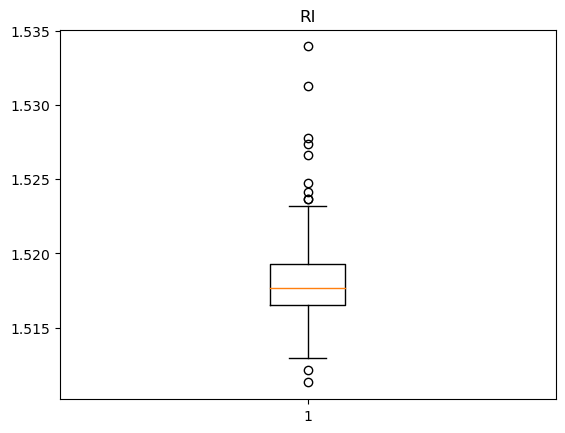

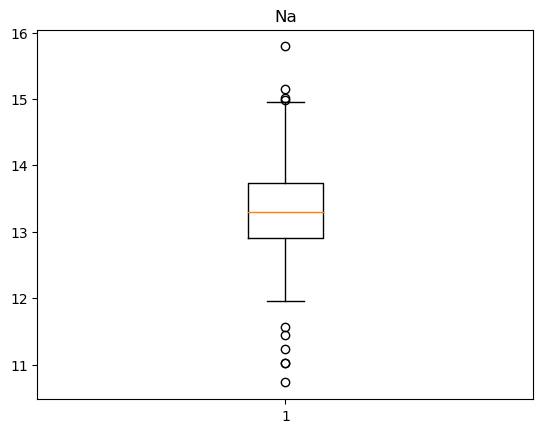

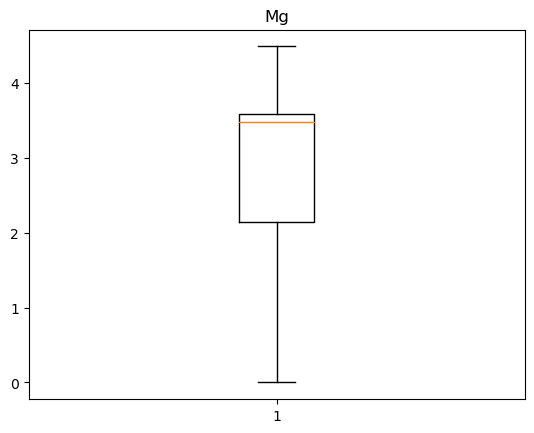

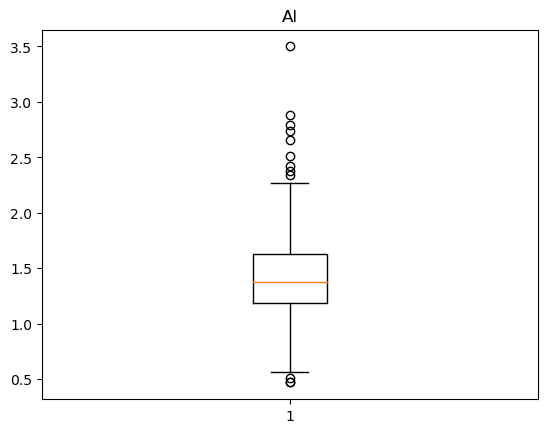

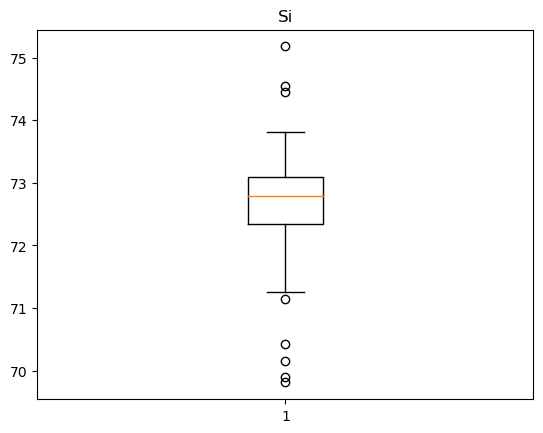

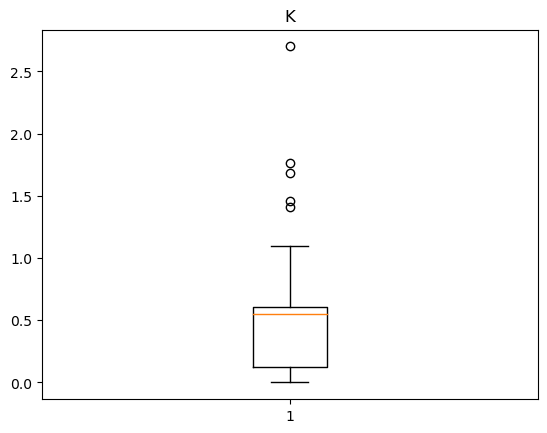

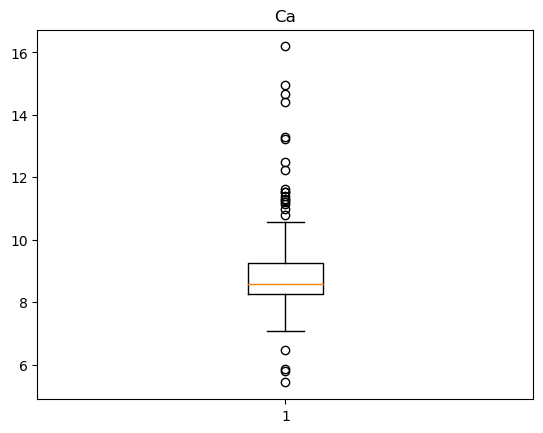

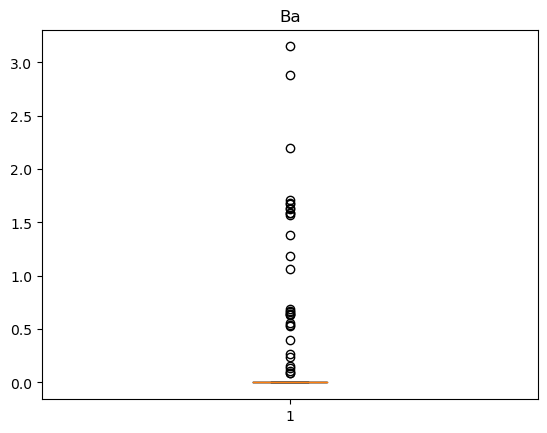

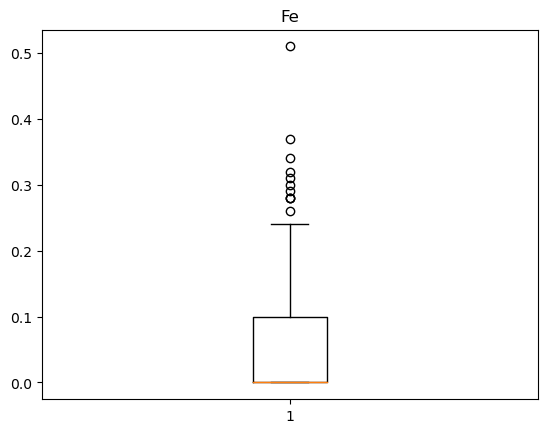

In [330]:
for f in feature:
    plt.boxplot(X_train[f])
    plt.title(f)
    plt.show()

In [331]:
def outliers(series):
    q1 = np.quantile(series, 0.25)
    q3  = np.quantile(series,  0.75)
    iqr  = q3 - q1
    lower  = q1 - 1.5 * iqr
    upper   = q3  +  1.5  * iqr
    return series[(series < lower) | (series > upper)].index
    

In [332]:
for f in feature:
    idxs = outliers(df[f])
    print(f'{f}: Выбросов = {len(idxs)}; Доля = {len(idxs)/df.shape[0]:.5f}')

RI: Выбросов = 17; Доля = 0.07944
Na: Выбросов = 7; Доля = 0.03271
Mg: Выбросов = 0; Доля = 0.00000
Al: Выбросов = 18; Доля = 0.08411
Si: Выбросов = 12; Доля = 0.05607
K: Выбросов = 7; Доля = 0.03271
Ca: Выбросов = 26; Доля = 0.12150
Ba: Выбросов = 38; Доля = 0.17757
Fe: Выбросов = 12; Доля = 0.05607


В Fe и Ba не будем искать выбросы, т.к. у них процентили 25 и 75 = 0.

Тут весь признак уйдет в выброс

В Ca получается большой процент выбросов. Его тоже пропустим

In [333]:
X2_train, X2_test, y2_train, y2_test  =  X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy() 

In [334]:
# Заполняем выбросы
for f in feature:
    if f in ['Fe', 'Ba', 'Ca']:
        continue
    idxs  = set(outliers(df[f]))
    test_idx = list(set(X2_test.index) & idxs)
    train_idx = list(set(X2_train.index)  & idxs)    
    X2_test.loc[test_idx, f]  =  np.nan
    X2_train.loc[train_idx, f]   =  np.nan
    df_na = df.groupby(target)[f].transform('median')
    X2_test[f].fillna(df_na, inplace=True)
    X2_train[f].fillna(df_na, inplace=True)

In [335]:
rf2 = RandomForestClassifier(
    random_state=1589
).fit(X2_train, y2_train)
rf2.score(X2_test, y2_test), rf2.score(X2_train, y2_train)

(0.7441860465116279, 1.0)

# Ищем выбросы на моделях

In [336]:
X3_train, X3_test, y3_train, y3_test   =  X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

Возьмем 3 модели и через каждую из них прогоним наш датасет

Потом сравним 3 стратегии
1. Выброс все, где хотя бы одна модель указала на выброс
2. Выброс все, где 2 модели указали на выброс
3. Выброс все, где 3 модели указали на выброс

Потом выберем ту, где будет наиболее подходящий результат по % выбросов


In [337]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [338]:
df['LOF'] =  LocalOutlierFactor().fit_predict(df[feature])
df["IF"] =  IsolationForest(contamination=0.1, random_state=1589).fit_predict(df[feature])
df['EE'] =  EllipticEnvelope(contamination=0.1, random_state=1589).fit_predict(df[feature])

In [339]:
df[['LOF',  'IF',  'EE']] = df[['LOF',  'IF',  'EE']].replace(1, 0)
df[['LOF',  'IF',  'EE']] = df[['LOF',  'IF',  'EE']].replace(-1, 1)

In [340]:
df['Strategy'] = df['LOF'] + df['IF'] + df['EE']

In [341]:
df['Strategy'].value_counts()/df.shape[0]

Strategy
0    0.733645
1    0.191589
2    0.037383
3    0.037383
Name: count, dtype: float64

Выберем стратегию 2. В выбросы попадет 7,4%

In [342]:
outliers_idx3 = set(df[(df['Strategy']  == 2) | (df['Strategy'] ==3)].index)

In [343]:
for f in feature:
    test_idx = list(set(X3_test.index) & outliers_idx3)
    train_idx = list(set(X3_train.index)  & outliers_idx3)    
    X3_test.loc[test_idx, f]  =  np.nan
    X3_train.loc[train_idx, f]   =  np.nan
    df_na = df.groupby(target)[f].transform('median')
    X3_test[f].fillna(df_na, inplace=True)
    X3_train[f].fillna(df_na, inplace=True)

In [344]:
rf3 = RandomForestClassifier(
    random_state=1589
).fit(X3_train, y3_train)
rf3.score(X3_test, y3_test), rf3.score(X3_train, y3_train)

(0.7674418604651163, 1.0)

# Выводы

In [345]:
print('Модель в лоб: Accuracy:  ', rf1.score(X_test, y_test))
print('Статистика: Accuracy:  ', rf2.score(X2_test, y2_test))
print('Поиск моделью: Accuracy:  ', rf3.score(X3_test, y3_test))

Модель в лоб: Accuracy:   0.7441860465116279
Статистика: Accuracy:   0.7441860465116279
Поиск моделью: Accuracy:   0.7674418604651163
